In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [11]:
#import the dataset data.csv (FIFA Dataset)
dataset=pd.read_csv("data.csv")

dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [12]:
# Remove Missing Values 
na = pd.notnull(dataset["Position"])
dataset=dataset[na]

In [13]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [14]:
#Get the required features for our classification problem where "Position" is Traget and others are input variables

dataset = dataset[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [15]:
dataset

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,CM,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,ST,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,ST,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,RW,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [16]:
#Categorizing positions:
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

#Replacing the values in Position column
dataset.loc[dataset["Position"] == "GK", "Position"] = 0

dataset.loc[dataset["Position"].isin(defender_player), "Position"] = 1

dataset.loc[dataset["Position"].isin(midfielder_player), "Position"] = 2

dataset.loc[dataset["Position"].isin(forward_player), "Position"] = 3

In [17]:
dataset

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,2,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,3,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,3,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,3,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [18]:
#split the Position into y and Input variables into X

X=dataset

In [19]:
print(dataset.dtypes)

Position            object
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
GKDiving           float64
GKHandling         float64
GKKicking          float64
GKPositioning      float64
GKReflexes         float64
dtype: object


In [20]:
dataset

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,2,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,3,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,3,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,3,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [21]:
X=dataset.drop(["Position"],axis=1)
y=dataset["Position"]

In [22]:
#Implementing the Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X=sc.fit_transform(X)

In [23]:
X

array([[ 2.53239138,  1.01829324,  2.13018987, ..., -0.07471326,
        -0.14026605, -0.48515932],
       [ 2.48117999,  2.11142369,  1.51776459, ..., -0.07471326,
        -0.14026605, -0.31809379],
       [ 2.12270028,  0.55802779,  1.72190635, ..., -0.07471326,
        -0.08156876, -0.31809379],
       ...,
       [-0.28423491, -0.36250311, -1.40826727, ..., -0.37767658,
        -0.60984437, -0.20671677],
       [ 0.22787896, -0.76523538, -1.13607826, ..., -0.13530592,
        -0.49244979, -0.42947081],
       [-0.59150323, -0.36250311, -0.72779475, ..., -0.43826925,
        -0.25766063, -0.42947081]])

In [24]:
#convert the y predict into categorical like matrix
from keras.utils.np_utils import to_categorical

y_cat = to_categorical(y)
print(y_cat)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [48]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_cat,test_size=0.3,random_state=0)


In [49]:
#Implementing the ANN by Keras
#Import the Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import PReLU,LeakyReLU,PReLU,ELU
from keras.layers import Dense
from keras.layers import Dropout

model=Sequential()
model.add(Dense(units=60,kernel_initializer='he_uniform',activation="relu",input_dim=33))
model.add(Dropout(0.1))

In [50]:
model.add(Dense(units=25,kernel_initializer='he_uniform',activation="relu"))
model.add(Dropout(0.3))

In [51]:
model.add(Dense(units=4,kernel_initializer='he_uniform',activation="softmax"))


In [52]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 60)                2040      
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 25)                1525      
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 104       
                                                                 
Total params: 3,669
Trainable params: 3,669
Non-trainable params: 0
_________________________________________________________________


In [53]:
#Fitting the ANN to the Training set
model_history=model.fit(X_train,y_train,validation_split=0.3,batch_size=20,epochs=100) 

Epoch 1/100
445/445 [==============================] - 1s 2ms/step - loss: 0.5731 - accuracy: 0.7664 - val_loss: 0.3490 - val_accuracy: 0.8570
Epoch 2/100
445/445 [==============================] - 1s 2ms/step - loss: 0.3860 - accuracy: 0.8437 - val_loss: 0.3173 - val_accuracy: 0.8688
Epoch 3/100
445/445 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8595 - val_loss: 0.3043 - val_accuracy: 0.8730
Epoch 4/100
445/445 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8644 - val_loss: 0.3020 - val_accuracy: 0.8769
Epoch 5/100
445/445 [==============================] - 1s 2ms/step - loss: 0.3252 - accuracy: 0.8689 - val_loss: 0.2976 - val_accuracy: 0.8764
Epoch 6/100
445/445 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.8641 - val_loss: 0.2930 - val_accuracy: 0.8767
Epoch 7/100
445/445 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.8728 - val_loss: 0.2939 - val_accuracy: 0.8761

Epoch 58/100
445/445 [==============================] - 1s 2ms/step - loss: 0.2414 - accuracy: 0.8976 - val_loss: 0.3330 - val_accuracy: 0.8806
Epoch 59/100
445/445 [==============================] - 1s 2ms/step - loss: 0.2362 - accuracy: 0.8998 - val_loss: 0.3332 - val_accuracy: 0.8670
Epoch 60/100
445/445 [==============================] - 1s 2ms/step - loss: 0.2357 - accuracy: 0.8969 - val_loss: 0.3290 - val_accuracy: 0.8751
Epoch 61/100
445/445 [==============================] - 1s 2ms/step - loss: 0.2391 - accuracy: 0.8996 - val_loss: 0.3289 - val_accuracy: 0.8740
Epoch 62/100
445/445 [==============================] - 1s 2ms/step - loss: 0.2387 - accuracy: 0.8979 - val_loss: 0.3353 - val_accuracy: 0.8756
Epoch 63/100
445/445 [==============================] - 1s 2ms/step - loss: 0.2376 - accuracy: 0.8999 - val_loss: 0.3351 - val_accuracy: 0.8738
Epoch 64/100
445/445 [==============================] - 1s 2ms/step - loss: 0.2327 - accuracy: 0.8991 - val_loss: 0.3466 - val_accuracy:

In [31]:
#list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


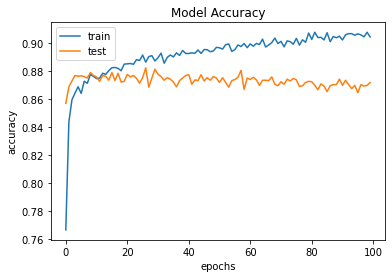

In [54]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train",'test'],loc='upper left')
plt.show()

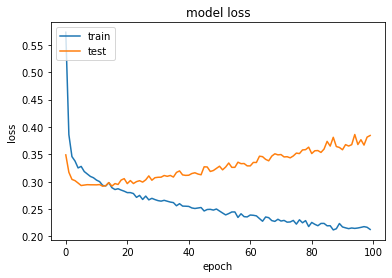

In [55]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
y_pred=model.predict(X_test)
y_pred_class=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_class)

[[5.0951355e-13 4.3690984e-06 9.9998939e-01 6.1917817e-06]
 [2.4774413e-21 2.8668626e-14 2.3130910e-01 7.6869088e-01]
 [1.8832782e-25 9.9738330e-01 2.6166665e-03 2.6672043e-21]
 ...
 [2.5022395e-09 3.2979615e-03 9.9632567e-01 3.7630851e-04]
 [8.0360492e-09 9.6397114e-01 3.6028869e-02 1.7282981e-09]
 [2.3129051e-27 4.9551593e-19 2.1145815e-01 7.8854179e-01]]
[2 3 1 ... 2 1 3]


In [57]:

y_test_class=np.argmax(y_test,axis=1)

print(y_pred_class)
print(y_test_class)

[2 3 1 ... 2 1 3]
[2 3 1 ... 2 1 3]


In [58]:
#finding confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_class, y_pred_class)
print(cm)

[[ 606    0    0    0]
 [   0 1653  124    3]
 [   0  178 1643  205]
 [   0    4  181  848]]


In [59]:
#find the classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       0.90      0.93      0.91      1780
           2       0.84      0.81      0.83      2026
           3       0.80      0.82      0.81      1033

    accuracy                           0.87      5445
   macro avg       0.89      0.89      0.89      5445
weighted avg       0.87      0.87      0.87      5445



In [60]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)

print(score)

0.8723599632690542
